In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
print(f"info dataset: {df_train.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
info dataset: None


In [4]:
print(f"{df_train.describe()}")

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

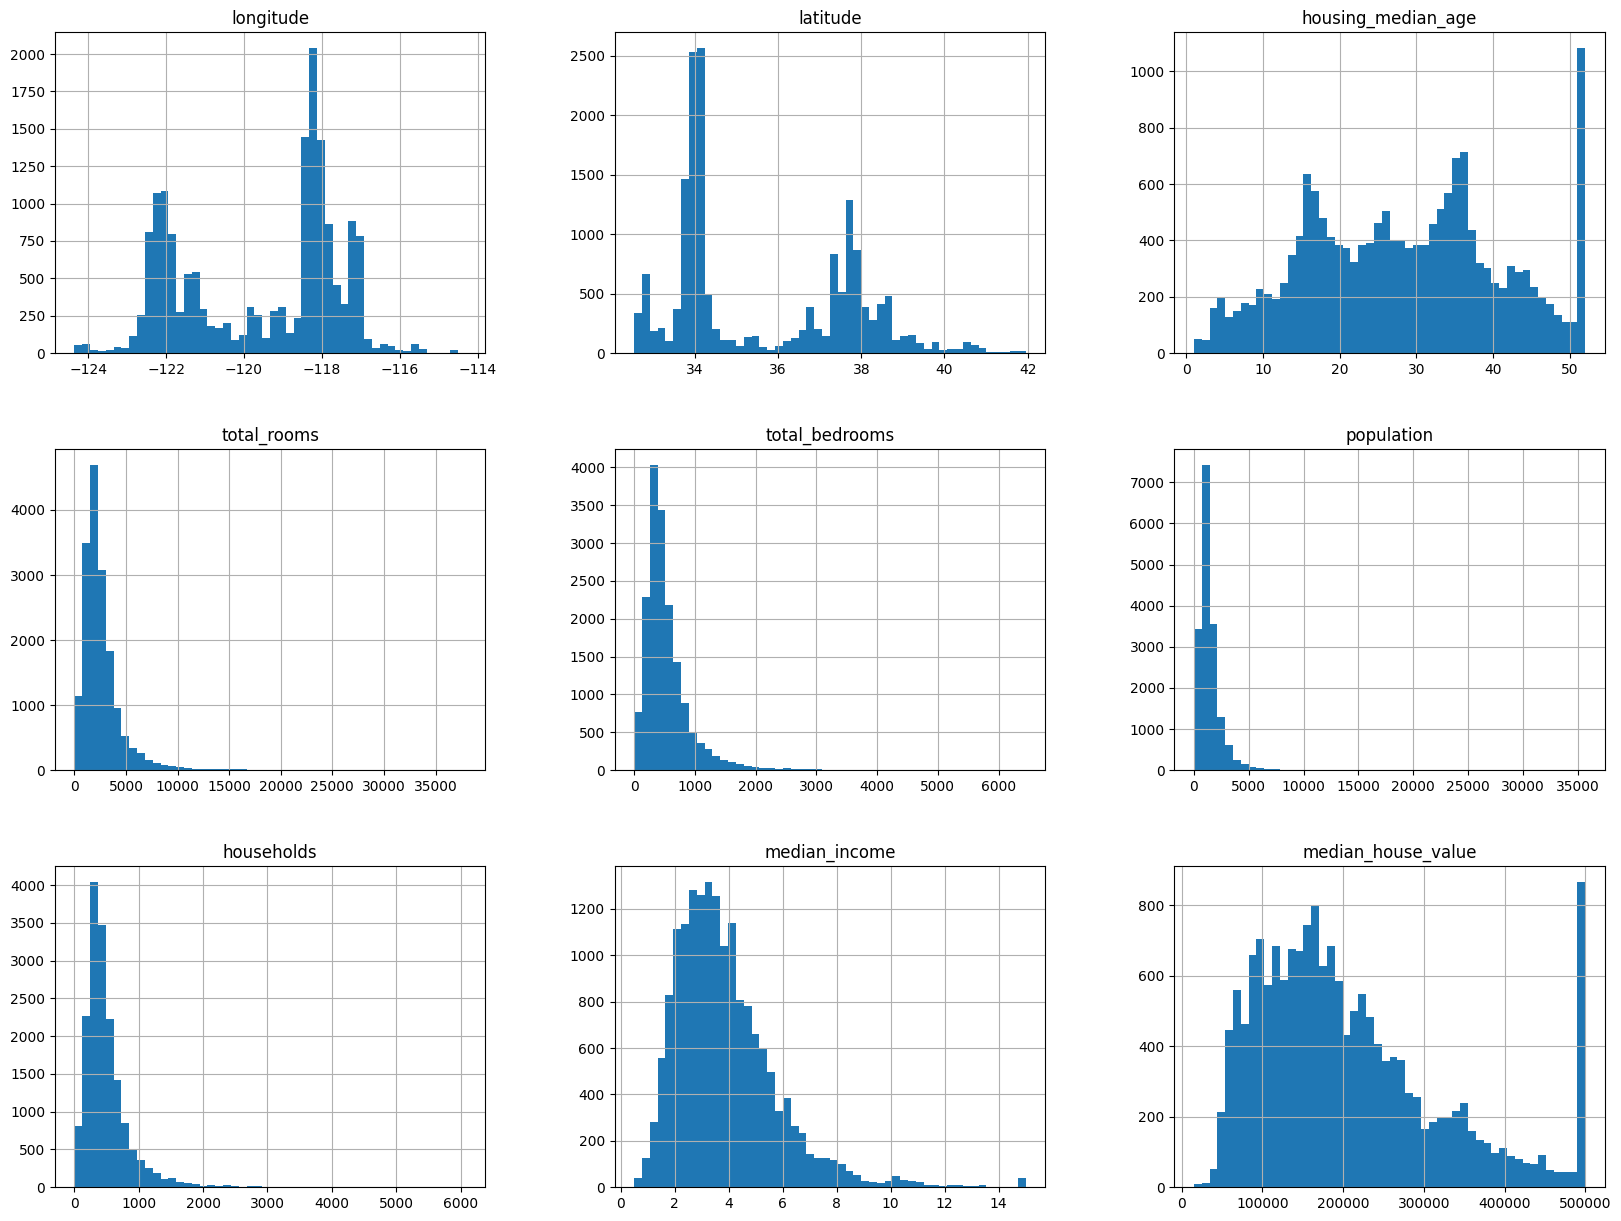

In [5]:
df_train.hist(bins = 50, figsize=(20,15))
#bins affect the finer-grainded histogram while more bins  give a more detailled histogram
#The figsize parameter controls the size of the histogram plot in terms of its width and height.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_categories
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,5
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,3
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,4
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,5
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,2
...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,1
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,3
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,2
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,3


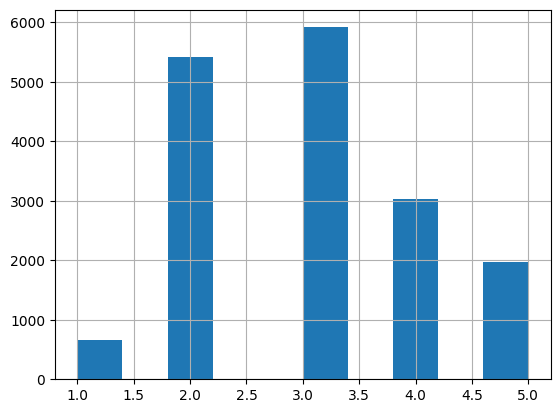

In [6]:
def add_feature(df: pd.DataFrame, name_new_features: str, name_target_feature: str)->pd.DataFrame:
  df[name_new_features] = pd.cut(df[name_target_feature], bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
  return df
add_feature(df_train, "income_categories","median_income")
df_train["income_categories"].hist()
add_feature(df_test,"income_categories","median_income")

<Axes: xlabel='longitude', ylabel='latitude'>

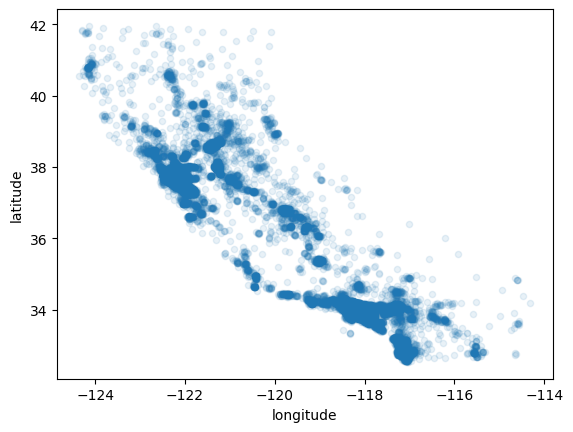

In [7]:
df_train.plot(kind="scatter" ,x="longitude", y="latitude", alpha=0.1)

In [8]:
corr_matrix =df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-8-9dd7faeb6c4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df_train.corr()


median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

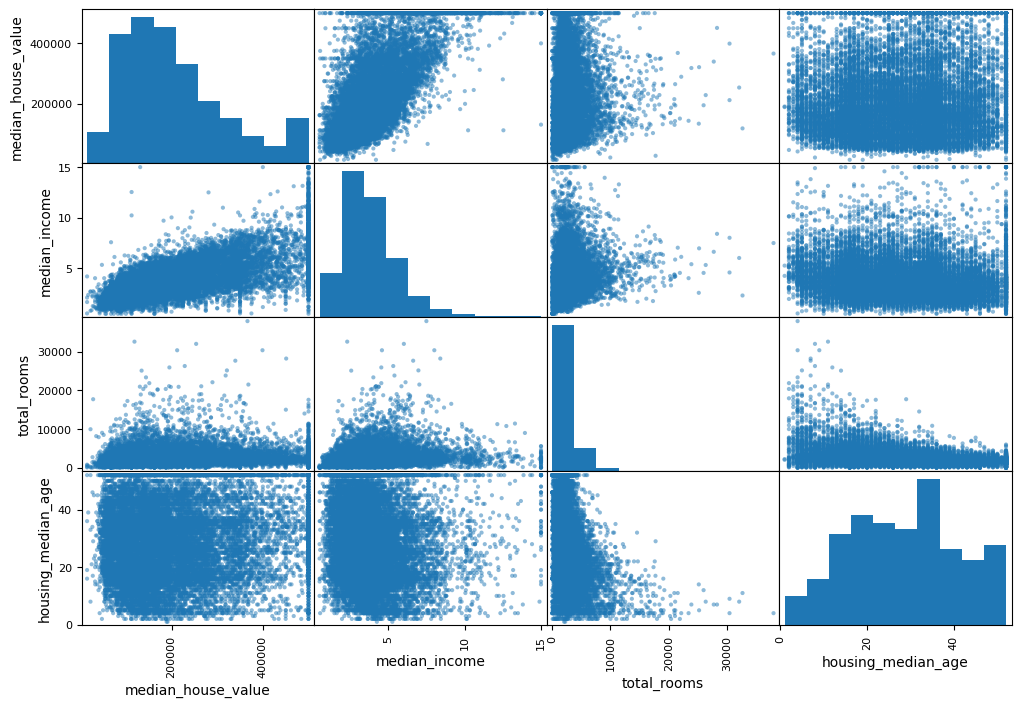

In [9]:
from pandas.plotting import scatter_matrix

attributes =  ["median_house_value","median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df_train[attributes], figsize = (12,8))

In [10]:
def add_feature_by_two_features(df:pd.DataFrame, name_new_features:str, name_target_features: list)->pd.DataFrame:
  df[name_new_features] = df[name_target_features[0]]/df[name_target_features[1]]
  return df

dataframe = [df_train, df_test]
for Dataframe in dataframe:
  add_feature_by_two_features(Dataframe,"rooms_per_household",["total_rooms","households"])
  add_feature_by_two_features(Dataframe,"bedrooms_per_room",["total_bedrooms","total_rooms"])
  add_feature_by_two_features(Dataframe,"population_per_household",["population","households"])
corr_matrix = df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-10-e75044982c97>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


median_house_value          1.000000
median_income               0.691871
rooms_per_household         0.150081
total_rooms                 0.130991
housing_median_age          0.106758
households                  0.061031
total_bedrooms              0.045783
population                 -0.027850
population_per_household   -0.042764
longitude                  -0.044982
latitude                   -0.144917
bedrooms_per_room          -0.258190
Name: median_house_value, dtype: float64

In [11]:
print(len(df_test))
print(len(df_train))

3000
17000


In [12]:
print(df_test.isna().any())
print(df_train.isna().any())

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms              False
population                  False
households                  False
median_income               False
median_house_value          False
income_categories           False
rooms_per_household         False
bedrooms_per_room           False
population_per_household    False
dtype: bool
longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms              False
population                  False
households                  False
median_income               False
median_house_value          False
income_categories           False
rooms_per_household         False
bedrooms_per_room           False
population_per_household    False
dtype: bool


In [13]:
df_train["total_rooms"].count()

17000

In [14]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [15]:
string_feature = "median_house_value"

y_train = df_train[string_feature]
y_test = df_test[string_feature]
X_test = df_test_copy.drop(string_feature, axis = 1)
X_train = df_train_copy.drop(string_feature, axis = 1)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

ml_pipeline = Pipeline([
    ("model", SVR())
    ])

In [17]:
y_train

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [18]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_categories,rooms_per_household,bedrooms_per_room,population_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1,11.889831,0.228617,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,2,16.522678,0.248497,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,2,6.153846,0.241667,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3,6.641593,0.224517,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,2,5.549618,0.224209,2.381679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,2,6.008130,0.177718,2.457995
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,2,5.051613,0.224777,2.567742
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,3,5.870614,0.198356,2.728070
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,2,5.589958,0.206587,2.715481


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"model__kernel": ["linear","rbf"],
     "model__C": [1, 5, 10],
     "model__gamma": ["auto", "scale"]}
]

grid_search_param = GridSearchCV(ml_pipeline,param_grid,cv=5, scoring = "neg_mean_squared_error",verbose=2)
grid_search_param.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model__C=1, model__gamma=auto, model__kernel=linear; total time=  56.8s
[CV] END model__C=1, model__gamma=auto, model__kernel=linear; total time=  45.5s
[CV] END model__C=1, model__gamma=auto, model__kernel=linear; total time=  52.3s
[CV] END model__C=1, model__gamma=auto, model__kernel=linear; total time=  47.7s
[CV] END model__C=1, model__gamma=auto, model__kernel=linear; total time=  55.4s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=  11.9s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=  12.1s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=  11.4s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=  10.9s
[CV] END ...model__C=1, model__gamma=auto, model__kernel=rbf; total time=  12.0s
[CV] END model__C=1, model__gamma=scale, model__kernel=linear; total time=  51.7s
[CV] END model__C=1, model__gamma=scale, model_

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVR())]),
             param_grid=[{'model__C': [1, 5, 10],
                          'model__gamma': ['auto', 'scale'],
                          'model__kernel': ['linear', 'rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [20]:
print("parameter:" ,grid_search_param.best_params_)
print("result: ", grid_search_param.best_score_)

parameter: {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'linear'}
result:  -6632573051.96097


In [21]:
import joblib
joblib.dump(grid_search_param, "SVM_housing_california.joblib")

['SVM_housing_california.joblib']